# Demo of using dimensional reduction plus svm.svc for classification problem

## Task 1: Read data

In [16]:
# Load scikit-learn package:
from sklearn import datasets
# Load data
digits = datasets.load_digits()
print(digits.data.shape)

(1797, 64)


In [17]:
import numpy as np
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
# Normalization 
# Why devided by 16 not 255? max min
X = data/16
y_labels = digits.target
y_labels = np.array(y_labels)

In [18]:
# Train test split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_labels,
                                                    test_size = 0.2,
                                                    shuffle=False)

In [19]:
print(f'The number of sample in the data train set: {len(y_train)}')
print(f'The number of sample in the data test set: {len(y_test)}')


The number of sample in the data train set: 1437
The number of sample in the data test set: 360


# Task 2: Dimensional reduction by PCA
The original data: 
-   number of features = 64
-   classes: 0 - 9
We will reduce the dimensional of feature from 64 to 10 by using PCA

In [20]:
from sklearn.decomposition import PCA
import pandas as pd
import time
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline

In [21]:
pca = PCA(n_components=10, random_state=0)
pca.fit(X_train)

PCA(n_components=10, random_state=0)

In [22]:
X_train_transformed = pca.transform(X_train)
print(X_train_transformed.shape)

(1437, 10)


## Task 3: Using the SVM.SVC model with kernel is RBF for the classification problem

In [23]:
from sklearn.svm import SVC
# Create SVC model with kernel is rbf (defaut kernel of SVC)
rbf_svc = SVC(C = 10, kernel='rbf')

In [24]:
# Fitting the data after the dimensional reduction step to svc model
rbf_svc.fit(X_train_transformed,y_train)

SVC(C=10)

Note that we have reduced dimensional of feature, so before we predict we have to do the dimensional reduction step first.

In [25]:
# Transform test data to new dimensional feature
X_test_transformed = pca.transform(X_test)

In [26]:
pred_test = rbf_svc.predict(X_test_transformed)

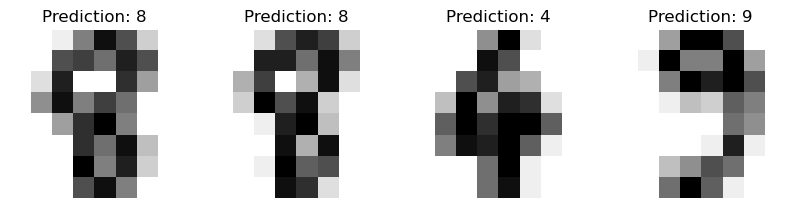

In [28]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test[100:100+4],pred_test[100:100+4]):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [29]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {rbf_svc}:\n"
      f"{metrics.classification_report(y_test,pred_test)}\n")

Classification report for classifier SVC(C=10):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.76      0.85        37
           4       0.94      0.92      0.93        37
           5       0.88      1.00      0.94        37
           6       1.00      0.97      0.99        37
           7       0.95      1.00      0.97        36
           8       0.88      0.91      0.90        33
           9       0.87      0.92      0.89        37

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  4  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  1  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  1 30  2]
 [ 0  1  0  1  0  1  0  0  0 34]]


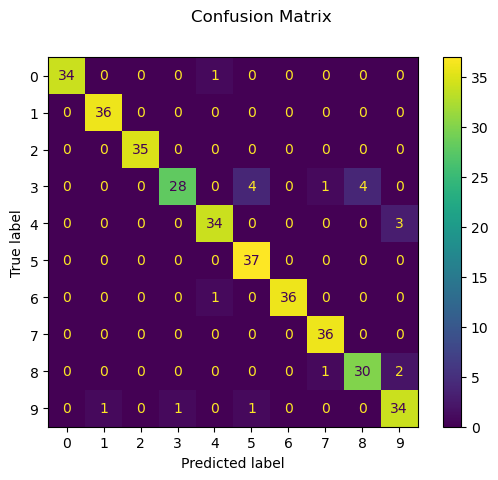

In [30]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pred_test)
print(acc_score)

0.9444444444444444
